## ДВИЖЕНИЕ ЗАРЯЖЕННЫХ ЧАСТИЦ В ЭЛЕКТРОМАГНИТНОМ ПОЛЕ

На заряженую частицу с зарядом $q$ движущуюся в ЭМП со скоростью $u$ действует сила Лоренца: $\vec{F}_L=q\left(\vec{E}+\left[\vec{u}\times\vec{B}\right]\right)$. Данная формула справедлива при ряде упрощений. Пренебрегая поправками на теорию относительности, считаем массу частицы постоянной, так что уравнение движения имеет вид: $\frac{d}{dt}(m\vec{u})=q\left(\vec{E}+\left[\vec{u}\times\vec{B}\right]\right)$

Направим ось Y вдоль электрического поля, ось Z  — вдоль магнитного поля и предположим для простоты, что начальная скорость частицы лежит в плоскости XY. В этом случае вся траектория частицы также будет лежать в этой плоскости. Уравнения движения примут вид:

$$
\left\{\begin{matrix}
m\ddot{x}=qB\dot{y} \\
m\ddot{y}=qE-qB\dot{x}
\end{matrix}\right.
$$

Обезразмерим: $x^*=\frac{x}{\lambda},\, y^*=\frac{y}{\lambda},\,\tau=\frac{ct}{\lambda},\, B^*=\frac{Bmc}{q\lambda},\, E^*=\frac{Emc^2}{q\lambda}$. Звёздочками обозначены размерные величины, а $\lambda$ - характерный размер рассматриваемой физической системы. Получим безразмерную систему уравнений движения заряженной частицы в магнитном поле:

$$
\left\{\begin{matrix}
\frac{d^2x}{d\tau^2}=B\frac{dy}{d\tau} \\
\frac{d^2y}{d\tau^2}=E-B\frac{dx}{d\tau}
\end{matrix}\right.
$$

Понизим порядок:

$$
\left\{\begin{matrix}
\frac{dx}{d\tau}=U_x \\
\frac{dy}{d\tau}=U_y \\
\frac{dU_x}{d\tau}=BU_y \\
\frac{dU_y}{d\tau}=E-BU_x
\end{matrix}\right.
$$

В качестве начальной конфигурации модели выберем: $B = 2$ Тл, $E = 5\cdot 10^4$, В/м $v_0=7\cdot 10^4$ м/с. Для численного решения воспользуемся пакетом *DifferentialEquations*:

In [1]:
using DifferentialEquations, Plots
pyplot()

┌ Info: Recompiling stale cache file C:\Users\Игорь\.julia\compiled\v1.0\DifferentialEquations\UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1187


Plots.PyPlotBackend()

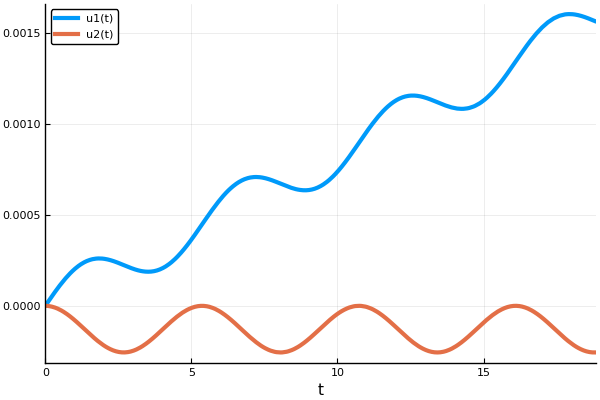

In [3]:
M = 9.11e-31 # kg
q = 1.6e-19 # C
C = 3e8 # m/s
λ = 1e-3 # m

function modelsolver(Bo = 2., Eo = 5e4, vel = 7e4)

    B = Bo*q*λ / (M*C)
    E = Eo*q*λ / (M*C*C)
    vel /= C

    A = [0. 0. 1. 0.;
        0. 0. 0. 1.;
        0. 0. 0. B;
        0. 0. -B 0.]

    syst(u,p,t) = A * u + [0.; 0.; 0.; E] # ODE system

    u0 = [0.0; 0.0; vel; 0.0] # start cond-ns
    tspan = (0.0, 6pi) # time period

    prob = ODEProblem(syst, u0, tspan) # problem to solve
    sol = solve(prob, Euler(), dt = 1e-4, save_idxs = [1, 2], timeseries_steps = 1000)
end

Solut = modelsolver()

plot(Solut)

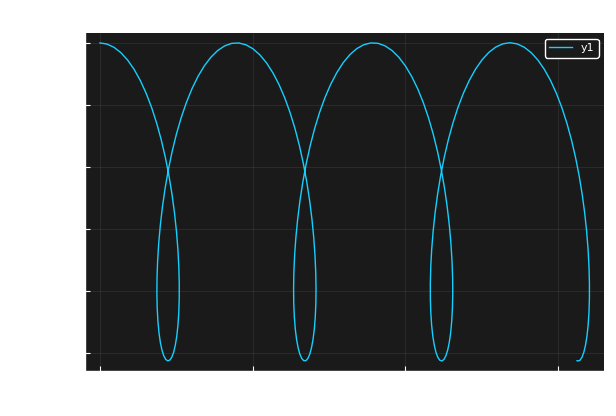

In [4]:
X = [Solut.u[i][1] for i in eachindex(Solut.u)]
Y = [Solut.u[i][2] for i in eachindex(Solut.u)]

plot(X, Y, xaxis=("X"), background_color=RGB(0.1, 0.1, 0.1))
title!("Траектория частицы")
yaxis!("Y")

savefig("XY1.png")

Проверим результат. Введем вместо **х** новую переменную $\tilde{x}=x-ut$. Таким образом осуществляется переход в новую систему координат, движущуюся относительно исходной со скоростью *u* в направлении оси *Х*:

$$
\left\{\begin{matrix}
\ddot{\tilde{x}}=qB\dot{y}/m \\
\ddot{y}=qE/m-qB\dot{x}/m -qBu/m
\end{matrix}\right.
$$

Если выбрать $u=E/B$ и обозначить $\omega=qB/m$, то система упростится:

$$
\left\{\begin{matrix}
\ddot{\tilde{x}}=\omega\dot{y} \\
\ddot{y}=-\omega\dot{\tilde{x}}
\end{matrix}\right.
$$

Электрическое поле исчезло из последних равенств, и они представляют собой уравнения движения частицы, находящейся под действием однородного магнитного поля. Таким образом, частица в новой системе координат *(х, у)* должна двигаться по окружности. Так как эта новая система координат сама перемещается относительно исходной со скоростью $u=E/B$, то результирующее движение частицы будет складываться из равномерного движения по оси *X* и вращения по окружности в плоскости *XY*. Как известно, траектория, возникающая при сложении таких двух движений, в общем случае представляет собой *трохоиду*. В частности, если начальная скорость равна нулю, реализуется простейший случай движения такого рода - по *циклоиде*.
Удостоверимся, что скорость дрейфа вышла действительно равной **Е/В**. Для этого:
+ подпортим матрицу ответов, поставив вместо первого элемента (максимального) заведомо меньшее значение
+ найдем номер максимального элемента во втором столбце матрицы ответов, который откладывается по ординате
+ вычислим безразмерную скорость дрейфа, разделив значение абсциссы в максимуме на соответствующее значение времени

In [22]:
Y[1] = -0.1
numax = argmax( Y )
X[numax] / Solut.t[numax]

8.334546850446588e-5

In [23]:
B = 2*q*λ / (M*C)
E = 5e4*q*λ / (M*C*C)
E/B

8.333333333333332e-5

С точностью до седьмого порядка! 
При нулевой начальной скорости, как и предполагалось, получаем *циклоиду*:

In [6]:
function plotter(ttle = "qwerty", Bo = 2, Eo = 4e4, vel = 7e4)
    Ans = modelsolver(Bo, Eo, vel)

    X = [Ans.u[i][1] for i in eachindex(Ans.u)]
    Y = [Ans.u[i][2] for i in eachindex(Ans.u)]
    plot!(X, Y)

    p = title!(ttle)
    savefig( p, ttle * ".png" )
end

plotter (generic function with 5 methods)

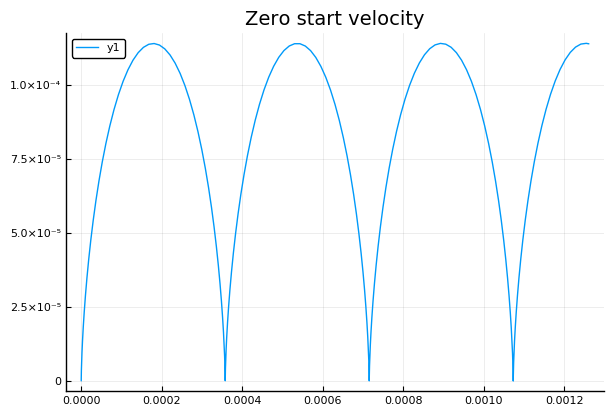

In [7]:
plot()
plotter("Zero start velocity", 2, 4e4, 0)

Поочередно получим траекторию частицы при занулении индукции, напряженности и при смене знака заряда

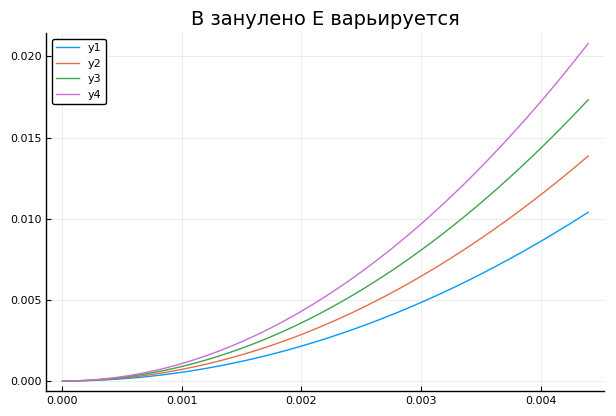

1×4 Array{Nothing,2}:
 nothing  nothing  nothing  nothing

In [107]:
plot()
plotter.("B занулено Е варьируется", 0, [3e4 4e4 5e4 6e4] )


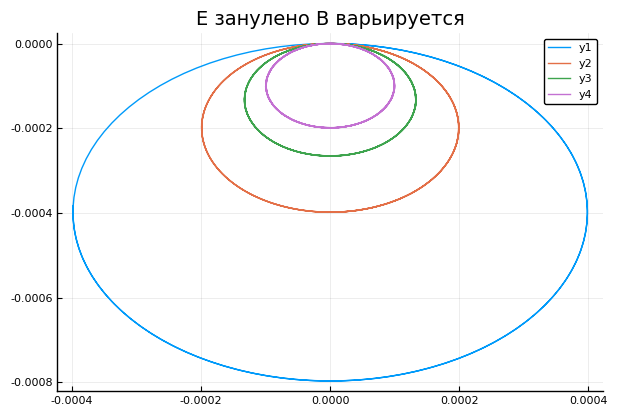

1×4 Array{Nothing,2}:
 nothing  nothing  nothing  nothing

In [108]:
plot()
plotter.("E занулено B варьируется", [1 2 3 4], 0 )

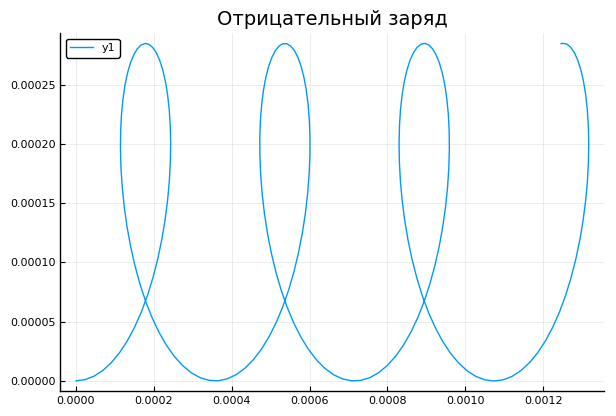

In [109]:
q = -1.6e-19 # C

plot()
plotter.("Отрицательный заряд")

И посмотрим, как влияет на траекторию частицы изменение начальной скорости:

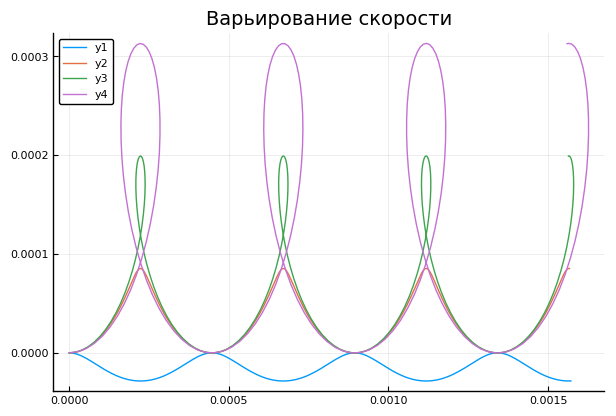

1×4 Array{Nothing,2}:
 nothing  nothing  nothing  nothing

In [110]:
plot()
plotter.("Варьирование скорости", 2, 5e4, [2e4 4e4 6e4 8e4] )